## Linear Regression with pytorch

In [1]:
import numpy as np
import matplotlib.pyplot as plt

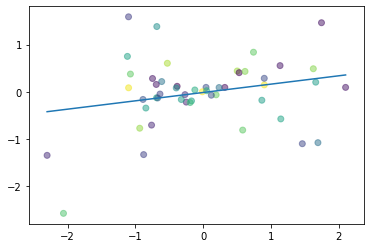

In [2]:
np.random.seed(1)
n = 50
x = np.random.randn(n)
y = x * np.random.randn(n)

colors = np.random.rand(n)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))

plt.scatter(x, y, c = colors, alpha = 0.5)
plt.show()

### Aim of Linear Regression

* Minimize distance between the points and the line (y = ax + B)
* Adjusting
    * Coefficients : a
    * Bias/Intercept : B

### Building toy dataset

In [3]:
x_values = [i for i in range(11)]

In [4]:
x_values

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [5]:
# Convert to numpy
x_train = np.array(x_values, dtype=np.float32)
x_train.shape

(11,)

In [6]:
# Important: 2D required
x_train = x_train.reshape(-1, 1)
print(x_train.shape)
x_train

(11, 1)


array([[ 0.],
       [ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.]], dtype=float32)

y = 2x + 1

In [7]:
y_values = [2*i + 1 for i in x_values]

In [8]:
y_values

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

In [9]:
y_train = np.array(y_values, dtype = np.float32)
y_train.shape
y_train

array([ 1.,  3.,  5.,  7.,  9., 11., 13., 15., 17., 19., 21.],
      dtype=float32)

In [10]:
# Important: 2D required
y_train = y_train.reshape(-1, 1)
print(y_train.shape)
y_train

(11, 1)


array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

## Building the model

In [11]:
import torch
import torch.nn as nn
from torch.autograd import Variable

### Create Model

1. Linear Model
    * True Equation: y = 2x +1
2. Forward
    * Example
        * Input x = 1
        * Output y_hat = ?

In [12]:
class LinearRegressionModel(nn.Module):  # always pass in nn.module
    def __init__(self, input_size, output_size):
        #inherits nn.module and allows you to access attributes from nn.module
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        #input_dim is x and output_dim is y
        
    def forward(self, x):
        out = self.linear(x)
        return out

### Instantiate Model Class
   * Input: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
   * desired output: [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

In [13]:
input_dim = 1
output_dim = 1

model = LinearRegressionModel(input_dim, output_dim)

#######################
#  USE GPU FOR MODEL  #
#######################
if torch.cuda.is_available():
    model.cuda()

### Instantiate Loss Class

   * MSE Loss: Mean Squared Error
   * MSE = 1/n

$$MSE = \frac{{1}}{{n}}    \sum (y - \hat{y})^2$$

* y_hat = prediction  
* y = true value

In [14]:
criterion = nn.MSELoss()

<img src="optimizer_class.png"
     style="float: left; margin-right: 10px;" />

In [15]:
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

<img src="train_model.png"
     style="float: left; margin-right: 10px;" />

In [16]:
epochs = 100

for epoch in range(epochs):
    ++epoch
    
    # Convert numpy array to torch Variable
    inputs = Variable(torch.from_numpy(x_train))
    labels = Variable(torch.from_numpy(y_train))
    
    
    #######################
    #  USE GPU FOR MODEL  #
    #######################
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(x_train).cuda())
        
    #######################
    #  USE GPU FOR MODEL  #
    #######################
    if torch.cuda.is_available():
        labels = Variable(torch.from_numpy(y_train).cuda())
        
    # Clear gradients w.r.t. parameters
    optimizer.zero_grad() 
    
    # Forward to get output
    outputs = model(inputs)
    
    # Calculate Loss
    loss = criterion(outputs, labels)
    
    # Getting gradients w.r.t. parameters
    loss.backward()
    
    # Updating parameters
    optimizer.step()
    
    # Logging
    print(f'epoch {epoch}, loss {loss.data}')

epoch 0, loss 284.4206848144531
epoch 1, loss 23.20188331604004
epoch 2, loss 1.8950631618499756
epoch 3, loss 0.15710538625717163
epoch 4, loss 0.015316873788833618
epoch 5, loss 0.0037238181103020906
epoch 6, loss 0.002750517101958394
epoch 7, loss 0.0026438161730766296
epoch 8, loss 0.002608118113130331
epoch 9, loss 0.002578485757112503
epoch 10, loss 0.0025496550370007753
epoch 11, loss 0.002521154470741749
epoch 12, loss 0.0024930189829319715
epoch 13, loss 0.0024651901330798864
epoch 14, loss 0.002437659539282322
epoch 15, loss 0.0024104348849505186
epoch 16, loss 0.002383498940616846
epoch 17, loss 0.0023568961769342422
epoch 18, loss 0.002330562798306346
epoch 19, loss 0.002304535126313567
epoch 20, loss 0.0022788115311414003
epoch 21, loss 0.0022533636074513197
epoch 22, loss 0.002228213008493185
epoch 23, loss 0.0022033245768398046
epoch 24, loss 0.0021787292789667845
epoch 25, loss 0.0021543814800679684
epoch 26, loss 0.0021303293760865927
epoch 27, loss 0.00210653361864388

### Compare Data

In [18]:
# Purely inference
predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()

In [19]:
predicted

array([[ 1.0569867],
       [ 3.04878  ],
       [ 5.0405736],
       [ 7.0323668],
       [ 9.02416  ],
       [11.015954 ],
       [13.007747 ],
       [14.99954  ],
       [16.991333 ],
       [18.983126 ],
       [20.97492  ]], dtype=float32)

In [20]:
y_train

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

### Plot Graph

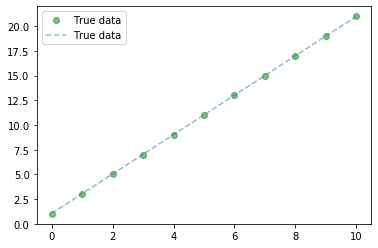

In [24]:
# Clear figure
plt.clf()

# Get predictions
predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()

# Plot true values
plt.plot(x_train, y_train, 'go', label = "True data", alpha = 0.5)

# Plot true values
plt.plot(x_train, predicted, '--', label = "True data", alpha = 0.5)

# Legend and plot
plt.legend(loc = "best")
plt.show()

### Save Model

In [27]:
model.state_dict()

OrderedDict([('linear.weight', tensor([[1.9918]])),
             ('linear.bias', tensor([1.0570]))])

In [30]:
save_model = False
if save_model is True:
    # Saves only parameters
    # alpha & beta
    torch.save(model.state_dict(), 'awesome_model.pkl')

In [31]:
load_model = False
if load_model is True:
    model.load_state_dict(torch.load('awesome_model.pkl'))

<img src="summary.png"
     style="float: left; margin-right: 10px;" />